# Sitt Hmue Paing

## Research question/interests

My research question is to find whether the number of reviewers influence the score. (focussing on very positive ratings)
- How many games that have a very positive value?
- Does the score being influenced by the number of reviewers

# EDA

- Import pandas and numpy
- Load the file (steam_games.csv)

In [111]:
import pandas as pd
import numpy as np

1. Successfully read the file and it display all columns and rows.

In [112]:
gamedataset = pd.read_csv("../data/raw/steam_games.csv")
gamedataset

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40828,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,NaN,NaN,"Feb 12, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...",NaN,"Casual,Simulation","About This Content Play ""Ghost Division"" by S...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7,

# Data Pipeline

2. Remove the columns in the table to will not be use to make the table cleaner

In [2]:
import project_functions3 as pf
# gamedata=(
#     gamedataset
#     .drop(columns=["url", "types", "game_description", "achievements", "minimum_requirements", "mature_content","recommended_requirements", "discount_price"])
#     .drop_duplicates(subset=["name"], inplace=False)
# )
# gamedata


gamedata = pf.dataloadnclean("../data/raw/steam_games.csv")
gamedata

,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,genre,original_price
0,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,$19.99
1,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...","Action,Adventure,Massively Multiplayer",$29.99
2,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy",$39.99
3,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer",$44.99
4,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",Free
...,...,...,...,...,...,...,...,...,...,...,...,...
40828,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,NaN,NaN,"Feb 12, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...","Casual,Simulation",$2.99
40829,Rocksmith® 2014 Edition – Remastered – Stone T...,NaN,NaN,NaN,"Feb 5, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...","Casual,Simulation",$2.99
40830,Fantasy Grounds - Quests of Doom 4: A Midnight...,NaN,NaN,NaN,"Jul 31, 2018","SmiteWorks USA, LLC",NaN,"RPG,Indie,Strategy,Software,Turn-Based,Fantasy...","Multi-player,Co-op,Cross-Platform Multiplayer,...",English,"Indie,RPG,Strategy",$7.99
40831,Mega Man X5 Sound Collection,NaN,NaN,NaN,"Jul 24, 2018","CAPCOM CO., LTD","CAPCOM CO., LTD,CAPCOM CO., LTD",Action,"Single-player,Downloadable Content,Steam Achie...","English,French,Italian,German,Spanish - Spain,...",Action,$9.99


3. Sorting the date in an ascending order.

In [ ]:
gamedata.sort_values(by=['release_date'], ascending= True)
gamedata.head()

,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,genre,original_price
0,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,$19.99
1,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...","Action,Adventure,Massively Multiplayer",$29.99
2,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy",$39.99
3,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer",$44.99
4,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",Free


4. Remove the column that contains bundle so that the analysis can be done on the game app to make things less complicated.

In [ ]:
df= gamedataset[gamedataset["types"].str.contains("bundle")==False]
df

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40828,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,NaN,NaN,"Feb 12, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...",NaN,"Casual,Simulation","About This Content Play ""Ghost Division"" by S...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7,

5. Removing columns that contains NaN including null columns.

In [ ]:
# df= gamedata[gamedata["release_date"].str.contains("TBA")==False]
# df= gamedata[gamedata["release_date"].datetime.contains("NaN")==False]
# df= gamedata[gamedata["release_date"].str.contains("Summer 2019")==False]

# df['year'] = pd.DatetimeIndex(df['release_date']).year
# df['month']= pd.DatetimeIndex(df['release_date']).month
# df

df=gamedata.dropna(subset=['all_reviews'])
df


,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,genre,original_price
0,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,$19.99
1,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...","Action,Adventure,Massively Multiplayer",$29.99
2,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy",$39.99
3,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer",$44.99
4,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",Free
...,...,...,...,...,...,...,...,...,...,...,...,...
40611,A Room Beyond,Solve a mysterious criminal case in this dark ...,NaN,"Positive,(11),- 90% of the 11 user reviews for...","Jun 13, 2017",René Bühling,"René Bühling,René Bühling","Adventure,Indie,Point & Click","Single-player,Steam Achievements,Steam Trading...","English,German,French,Italian,Spanish - Spain","Adventure,Indie",$7.99
40708,Die In The Dark,Die in the Dark is a first-person exploration ...,NaN,"1 user reviews,- Need more user reviews to gen...","Jul 20, 2018",Side B Gaming,"Side B Gaming,Side B Gaming","Adventure,Gore,Indie,Violent,Simulation","Single-player,Profile Features Limited \r\n\t\...",English,"Adventure,Indie,Simulation",$4.99
40728,Chasing the Stars,Chasing the Stars is a steampunk-ish multichoi...,NaN,"Mostly Positive,(10),- 70% of the 10 user revi...","Jan 23, 2019",Ertal Games,"Ertal Games,Ertal Games","Nudity,Sexual Content,Indie,Steampunk,Story Ri...","Single-player,Steam Achievements,Profile Featu...",English,Indie,$9.99
40799,Fruit Tower Defense,Fruit Tower Defense is a strategy video game c...,NaN,"4 user reviews,- Need more user reviews to gen...","Jul 25, 2018",Fratboy Entertainment,"Fratboy Entertainment,Fratboy Entertainment","Strategy,Adventure,Indie,Casual,Tower Defense","Single-player,Steam Achievements,Profile Featu...",English,"Adventure,Casual,Indie,Strategy",$3.99


# Data Analysis

Checking the unique ratings in all_reviews 

In [ ]:
gamedata['all_reviews'].unique()

array(['Very Positive,(42,550),- 92% of the 42,550 user reviews for this game are positive.',
       'Mixed,(836,608),- 49% of the 836,608 user reviews for this game are positive.',
       'Mostly Positive,(7,030),- 71% of the 7,030 user reviews for this game are positive.',
       ...,
       'Mixed,(2,044),- 55% of the 2,044 user reviews for this game are positive.',
       'Very Positive,(106),- 99% of the 106 user reviews for this game are positive.',
       'Very Positive,(469),- 96% of the 469 user reviews for this game are positive.'],
      dtype=object)

In [ ]:
gamedata['recent_reviews'].unique()

array(['Very Positive,(554),- 89% of the 554 user reviews in the last 30 days are positive.',
       'Mixed,(6,214),- 49% of the 6,214 user reviews in the last 30 days are positive.',
       'Mixed,(166),- 54% of the 166 user reviews in the last 30 days are positive.',
       ...,
       'Very Negative,(20),- 15% of the 20 user reviews in the last 30 days are positive.',
       'Very Negative,(13),- 7% of the 13 user reviews in the last 30 days are positive.',
       'Mixed,(40),- 50% of the 40 user reviews in the last 30 days are positive.'],
      dtype=object)

# Splitting all_reviews column into different column (Rating and Numbers of users rated) and drop all_review column.
# Rating show wide range of users review (positive, Mixed Negative, etc..)

### Since the all_reviews column have is mixed with integer and string, I split them into columns for easier analysis.

In [ ]:
# new data frame with split value columns
new = gamedata["all_reviews"].str.split(",", n = 1, expand = True)

gamedata.dropna(inplace = True)
 
# making separate first name column from new data frame
gamedata["Rating"]= new[0]

# making separate last name column from new data frame
gamedata["Number of users rated"]= new[1]
 
# Dropping old Name columns
gamedata.drop(columns =["all_reviews"], inplace = True)
 
# df display
gamedata

,name,desc_snippet,recent_reviews,release_date,developer,publisher,popular_tags,game_details,languages,genre,original_price,Rating,Number of users rated
0,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,$19.99,Very Positive,"(42,550),- 92% of the 42,550 user reviews for ..."
1,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...","Action,Adventure,Massively Multiplayer",$29.99,Mixed,"(836,608),- 49% of the 836,608 user reviews fo..."
2,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy",$39.99,Mostly Positive,"(7,030),- 71% of the 7,030 user reviews for th..."
3,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer",$44.99,Mixed,"(167,115),- 61% of the 167,115 user reviews fo..."
4,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",Free,Mostly Positive,"(11,481),- 74% of the 11,481 user reviews for ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32238,The Wild Age,The Wild Age is a micromanagement strategy gam...,"Mixed,(10),- 40% of the 10 user reviews in the...","Mar 7, 2019",McMagic Productions,"McMagic Productions,McMagic Productions","Early Access,Casual,Strategy,Simulation,Early ...","Single-player,Steam Achievements,Full controll...","English,French,Russian,Czech,Spanish - Spain,D...","Casual,Indie,Simulation,Strategy,Early Access",$14.99,Mostly Positive,"(61),- 75% of the 61 user reviews for this gam..."
34570,eSports Legend / 电竞传奇,Esports Legend is a Esports club simulator. Yo...,"Very Positive,(12),- 83% of the 12 user review...","Oct 16, 2018",90Games,"Coconut Island Games,Coconut Island Games","Indie,Strategy,Simulation,Casual,Management,e-...","Single-player,Steam Achievements,Steam Cloud","English,Simplified Chinese","Casual,Indie,Simulation,Strategy",$9.99,Mixed,"(593),- 62% of the 593 user reviews for this g..."
35297,KARAKARA,KARAKARA. It is the sound of aridity. It is th...,"Very Positive,(19),- 94% of the 19 user review...","Jun 27, 2016",calme,"Sekai Project,Sekai Project","Visual Novel,Anime,Sexual Content,Nudity,Cute,...","Single-player,Steam Achievements,Steam Trading...","English,Japanese,Traditional Chinese,German","Casual,Indie",$9.99,Overwhelmingly Positive,"(789),- 96% of the 789 user reviews for this g..."
38390,Moto Racer 4,Choose from a variety of daring riders and get...,"Mixed,(19),- 42% of the 19 user reviews in the...","Nov 3, 2016",Artefacts Studios,"Microids,Microids","Racing,Sports,Action,Multiplayer,Offroad,Arcad...","Single-player,Online Multi-Player,Shared/Split...","English,French,Italian,German,Spanish - Spain,..."

# Splitting all_reviews column into different column (Number of users rated and Percentage of positive reviews ) and drop Number of users rated column.

### Number of Users show the amount of people in total that review the game.


In [ ]:
# new data frame with split value columns
new = gamedata["Number of users rated"].str.split(",-", n = 1, expand = True)
 
# making separate first name column from new data frame
gamedata["Number of users"]= new[0]

# making separate last name column from new data frame
gamedata["Percentage of positive reviews"]= new[1]

gamedata.drop(columns =["Number of users rated"], inplace = True)
 
# df display
gamedata


,name,desc_snippet,recent_reviews,release_date,developer,publisher,popular_tags,game_details,languages,genre,original_price,Rating,Number of users,Percentage of positive reviews
0,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,$19.99,Very Positive,"(42,550)","92% of the 42,550 user reviews for this game ..."
1,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...","Action,Adventure,Massively Multiplayer",$29.99,Mixed,"(836,608)","49% of the 836,608 user reviews for this game..."
2,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy",$39.99,Mostly Positive,"(7,030)","71% of the 7,030 user reviews for this game a..."
3,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer",$44.99,Mixed,"(167,115)","61% of the 167,115 user reviews for this game..."
4,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",Free,Mostly Positive,"(11,481)","74% of the 11,481 user reviews for this game ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32238,The Wild Age,The Wild Age is a micromanagement strategy gam...,"Mixed,(10),- 40% of the 10 user reviews in the...","Mar 7, 2019",McMagic Productions,"McMagic Productions,McMagic Productions","Early Access,Casual,Strategy,Simulation,Early ...","Single-player,Steam Achievements,Full controll...","English,French,Russian,Czech,Spanish - Spain,D...","Casual,Indie,Simulation,Strategy,Early Access",$14.99,Mostly Positive,(61),75% of the 61 user reviews for this game are ...
34570,eSports Legend / 电竞传奇,Esports Legend is a Esports club simulator. Yo...,"Very Positive,(12),- 83% of the 12 user review...","Oct 16, 2018",90Games,"Coconut Island Games,Coconut Island Games","Indie,Strategy,Simulation,Casual,Management,e-...","Single-player,Steam Achievements,Steam Cloud","English,Simplified Chinese","Casual,Indie,Simulation,Strategy",$9.99,Mixed,(593),62% of the 593 user reviews for this game are...
35297,KARAKARA,KARAKARA. It is the sound of aridity. It is th...,"Very Positive,(19),- 94% of the 19 user review...","Jun 27, 2016",calme,"Sekai Project,Sekai Project","Visual Novel,Anime,Sexual Content,Nudity,Cute,...","Single-player,Steam Achievements,Steam Trading...","English,Japanese,Traditional Chinese,German","Casual,Indie",$9.99,Overwhelmingly Positive,(789),96% of the 789 user reviews for this game are...
38390,Moto Racer 4,Choose from a variety of daring riders and get...,"Mixed,(19),- 42% of the 19 user reviews in the...","Nov 3, 2016",Artefacts Studios,"Microids,Microids","Racing,Sports,Action,Multiplayer,Offroad,Arcad...","Single-player,

# Splitting Percentage of positive reviews into different column (Percentage of positive rating) and drop Percentage of positive reviews, Number of users and Numbers column.

### The result I am looking for is to get the percentage of the users that review the game as positive. The below column (Percentage of positive rating) shows the overall percentage of users rating the game as positive.

In [ ]:
# new data frame with split value columns
new = gamedata["Percentage of positive reviews"].str.split("%", n = 1, expand = True)
 
# making separate first name column from new data frame
gamedata["Percentage of positive rating"]= new[0]

# making separate last name column from new data frame
gamedata["Numbers"]= new[1]

gamedata.drop(columns =["Percentage of positive reviews"], inplace = True)
gamedata.drop(columns =["Numbers"], inplace = True)
gamedata.drop(columns =["Number of users"], inplace = True)


 
# df display
gamedata

,name,desc_snippet,recent_reviews,release_date,developer,publisher,popular_tags,game_details,languages,genre,original_price,Rating,Percentage of positive rating
0,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,$19.99,Very Positive,92
1,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...","Action,Adventure,Massively Multiplayer",$29.99,Mixed,49
2,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy",$39.99,Mostly Positive,71
3,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer",$44.99,Mixed,61
4,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",Free,Mostly Positive,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32238,The Wild Age,The Wild Age is a micromanagement strategy gam...,"Mixed,(10),- 40% of the 10 user reviews in the...","Mar 7, 2019",McMagic Productions,"McMagic Productions,McMagic Productions","Early Access,Casual,Strategy,Simulation,Early ...","Single-player,Steam Achievements,Full controll...","English,French,Russian,Czech,Spanish - Spain,D...","Casual,Indie,Simulation,Strategy,Early Access",$14.99,Mostly Positive,75
34570,eSports Legend / 电竞传奇,Esports Legend is a Esports club simulator. Yo...,"Very Positive,(12),- 83% of the 12 user review...","Oct 16, 2018",90Games,"Coconut Island Games,Coconut Island Games","Indie,Strategy,Simulation,Casual,Management,e-...","Single-player,Steam Achievements,Steam Cloud","English,Simplified Chinese","Casual,Indie,Simulation,Strategy",$9.99,Mixed,62
35297,KARAKARA,KARAKARA. It is the sound of aridity. It is th...,"Very Positive,(19),- 94% of the 19 user review...","Jun 27, 2016",calme,"Sekai Project,Sekai Project","Visual Novel,Anime,Sexual Content,Nudity,Cute,...","Single-player,Steam Achievements,Steam Trading...","English,Japanese,Traditional Chinese,German","Casual,Indie",$9.99,Overwhelmingly Positive,96
38390,Moto Racer 4,Choose from a variety of daring riders and get...,"Mixed,(19),- 42% of the 19 user reviews in the...","Nov 3, 2016",Artefacts Studios,"Microids,Microids","Racing,Sports,Action,Multiplayer,Offroad,Arcad...","Single-player,Online Multi-Player,Shared/Split...","English,French,Italian,German,Spanish - Spain,...",Racing,$14.99,Mixed,59


### This step is also split the columns like the I have done previously for all_reviews column but this time, its on recent_reviews column.
### I am repeating the same steps as I have done above for recent_reviews

In [ ]:
# new data frame with split value columns
new = gamedata["recent_reviews"].str.split(",", n = 1, expand = True)

gamedata.dropna(inplace = True)
 
# making separate first name column from new data frame
gamedata["Rating(Recent Review)"]= new[0]

# making separate last name column from new data frame
gamedata["Number of users rated(Recent Review)"]= new[1]
 
# Dropping old Name columns
gamedata.drop(columns =["recent_reviews"], inplace = True)
 
# df display
gamedata

,name,desc_snippet,release_date,developer,publisher,popular_tags,game_details,languages,genre,original_price,Rating,Percentage of positive rating,Rating(Recent Review),Number of users rated(Recent Review)
0,DOOM,Now includes all three premium DLC packs (Unto...,"May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,$19.99,Very Positive,92,Very Positive,"(554),- 89% of the 554 user reviews in the las..."
1,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...","Action,Adventure,Massively Multiplayer",$29.99,Mixed,49,Mixed,"(6,214),- 49% of the 6,214 user reviews in the..."
2,BATTLETECH,Take command of your own mercenary outfit of '...,"Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy",$39.99,Mostly Positive,71,Mixed,"(166),- 54% of the 166 user reviews in the las..."
3,DayZ,The post-soviet country of Chernarus is struck...,"Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer",$44.99,Mixed,61,Mixed,"(932),- 57% of the 932 user reviews in the las..."
4,EVE Online,EVE Online is a community-driven spaceship MMO...,"May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",Free,Mostly Positive,74,Mixed,"(287),- 54% of the 287 user reviews in the las..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32238,The Wild Age,The Wild Age is a micromanagement strategy gam...,"Mar 7, 2019",McMagic Productions,"McMagic Productions,McMagic Productions","Early Access,Casual,Strategy,Simulation,Early ...","Single-player,Steam Achievements,Full controll...","English,French,Russian,Czech,Spanish - Spain,D...","Casual,Indie,Simulation,Strategy,Early Access",$14.99,Mostly Positive,75,Mixed,"(10),- 40% of the 10 user reviews in the last ..."
34570,eSports Legend / 电竞传奇,Esports Legend is a Esports club simulator. Yo...,"Oct 16, 2018",90Games,"Coconut Island Games,Coconut Island Games","Indie,Strategy,Simulation,Casual,Management,e-...","Single-player,Steam Achievements,Steam Cloud","English,Simplified Chinese","Casual,Indie,Simulation,Strategy",$9.99,Mixed,62,Very Positive,"(12),- 83% of the 12 user reviews in the last ..."
35297,KARAKARA,KARAKARA. It is the sound of aridity. It is th...,"Jun 27, 2016",calme,"Sekai Project,Sekai Project","Visual Novel,Anime,Sexual Content,Nudity,Cute,...","Single-player,Steam Achievements,Steam Trading...","English,Japanese,Traditional Chinese,German","Casual,Indie",$9.99,Overwhelmingly Positive,96,Very Positive,"(19),- 94% of the 19 user reviews in the last ..."
38390,Moto Racer 4,Choose from a variety of daring riders and get...,"Nov 3, 2016",Artefacts Studios,"Microids,Microids","Racing,Sports,Action,Multiplayer,Offroad,Arcad...","Single-player,Online Multi-Player,Shared/Split...","English,French,Italian,German,Spanish - Spain,...",Racing,$14.99,Mixed,59,Mixed,"(19),- 42% of the 19 user reviews in the last ..."


In [ ]:
# new data frame with split value columns
new = gamedata["Number of users rated(Recent Review)"].str.split(",-", n = 1, expand = True)
 
# making separate first name column from new data frame
gamedata["Number of users(Recent Review)"]= new[0]

# making separate last name column from new data frame
gamedata["Percentage of positive reviews(Recent Review)"]= new[1]

gamedata.drop(columns =["Number of users rated(Recent Review)"], inplace = True)
 
# df display
gamedata

,name,desc_snippet,release_date,developer,publisher,popular_tags,game_details,languages,genre,original_price,Rating,Percentage of positive rating,Rating(Recent Review),Number of users(Recent Review),Percentage of positive reviews(Recent Review)
0,DOOM,Now includes all three premium DLC packs (Unto...,"May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,$19.99,Very Positive,92,Very Positive,(554),89% of the 554 user reviews in the last 30 da...
1,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...","Action,Adventure,Massively Multiplayer",$29.99,Mixed,49,Mixed,"(6,214)","49% of the 6,214 user reviews in the last 30 ..."
2,BATTLETECH,Take command of your own mercenary outfit of '...,"Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy",$39.99,Mostly Positive,71,Mixed,(166),54% of the 166 user reviews in the last 30 da...
3,DayZ,The post-soviet country of Chernarus is struck...,"Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer",$44.99,Mixed,61,Mixed,(932),57% of the 932 user reviews in the last 30 da...
4,EVE Online,EVE Online is a community-driven spaceship MMO...,"May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",Free,Mostly Positive,74,Mixed,(287),54% of the 287 user reviews in the last 30 da...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32238,The Wild Age,The Wild Age is a micromanagement strategy gam...,"Mar 7, 2019",McMagic Productions,"McMagic Productions,McMagic Productions","Early Access,Casual,Strategy,Simulation,Early ...","Single-player,Steam Achievements,Full controll...","English,French,Russian,Czech,Spanish - Spain,D...","Casual,Indie,Simulation,Strategy,Early Access",$14.99,Mostly Positive,75,Mixed,(10),40% of the 10 user reviews in the last 30 day...
34570,eSports Legend / 电竞传奇,Esports Legend is a Esports club simulator. Yo...,"Oct 16, 2018",90Games,"Coconut Island Games,Coconut Island Games","Indie,Strategy,Simulation,Casual,Management,e-...","Single-player,Steam Achievements,Steam Cloud","English,Simplified Chinese","Casual,Indie,Simulation,Strategy",$9.99,Mixed,62,Very Positive,(12),83% of the 12 user reviews in the last 30 day...
35297,KARAKARA,KARAKARA. It is the sound of aridity. It is th...,"Jun 27, 2016",calme,"Sekai Project,Sekai Project","Visual Novel,Anime,Sexual Content,Nudity,Cute,...","Single-player,Steam Achievements,Steam Trading...","English,Japanese,Traditional Chinese,German","Casual,Indie",$9.99,Overwhelmingly Positive,96,Very Positive,(19),94% of the 19 user reviews in the last 30 day...
38390,Moto Racer 4,Choose from a variety of daring riders and get...,"Nov 3, 2016",Artefacts Studios,"Microids,Microids","Racing,Sports,Action,Multiplayer,Offroad,Arcad...","Single-player,Online Multi-Player,Shared/Split...","English,French,Italian,German,Spanish - Spain,...",Racing,$14.99,Mixed,59,Mixed,(19),42% of the 19 user reviews in the last 30 day...


### Now I have obtained the percentage of positive rating from the users for the recent review as shown below in the last column of the dataset

In [ ]:
new = gamedata["Percentage of positive reviews(Recent Review)"].str.split("%", n = 1, expand = True)
 
# making separate first name column from new data frame
gamedata["Percentage of positive rating(Recent Review)"]= new[0]

# making separate last name column from new data frame
gamedata["Numbers(Recent Review)"]= new[1]

gamedata.drop(columns =["Percentage of positive reviews(Recent Review)"], inplace = True)
gamedata.drop(columns =["Numbers(Recent Review)"], inplace = True)
gamedata.drop(columns =["Number of users(Recent Review)"], inplace = True)
 
# df display
gamedata

,name,desc_snippet,release_date,developer,publisher,popular_tags,game_details,languages,genre,original_price,Rating,Percentage of positive rating,Rating(Recent Review),Percentage of positive rating(Recent Review)
0,DOOM,Now includes all three premium DLC packs (Unto...,"May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,$19.99,Very Positive,92,Very Positive,89
1,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...","Action,Adventure,Massively Multiplayer",$29.99,Mixed,49,Mixed,49
2,BATTLETECH,Take command of your own mercenary outfit of '...,"Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian","Action,Adventure,Strategy",$39.99,Mostly Positive,71,Mixed,54
3,DayZ,The post-soviet country of Chernarus is struck...,"Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...","Action,Adventure,Massively Multiplayer",$44.99,Mixed,61,Mixed,57
4,EVE Online,EVE Online is a community-driven spaceship MMO...,"May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French","Action,Free to Play,Massively Multiplayer,RPG,...",Free,Mostly Positive,74,Mixed,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32238,The Wild Age,The Wild Age is a micromanagement strategy gam...,"Mar 7, 2019",McMagic Productions,"McMagic Productions,McMagic Productions","Early Access,Casual,Strategy,Simulation,Early ...","Single-player,Steam Achievements,Full controll...","English,French,Russian,Czech,Spanish - Spain,D...","Casual,Indie,Simulation,Strategy,Early Access",$14.99,Mostly Positive,75,Mixed,40
34570,eSports Legend / 电竞传奇,Esports Legend is a Esports club simulator. Yo...,"Oct 16, 2018",90Games,"Coconut Island Games,Coconut Island Games","Indie,Strategy,Simulation,Casual,Management,e-...","Single-player,Steam Achievements,Steam Cloud","English,Simplified Chinese","Casual,Indie,Simulation,Strategy",$9.99,Mixed,62,Very Positive,83
35297,KARAKARA,KARAKARA. It is the sound of aridity. It is th...,"Jun 27, 2016",calme,"Sekai Project,Sekai Project","Visual Novel,Anime,Sexual Content,Nudity,Cute,...","Single-player,Steam Achievements,Steam Trading...","English,Japanese,Traditional Chinese,German","Casual,Indie",$9.99,Overwhelmingly Positive,96,Very Positive,94
38390,Moto Racer 4,Choose from a variety of daring riders and get...,"Nov 3, 2016",Artefacts Studios,"Microids,Microids","Racing,Sports,Action,Multiplayer,Offroad,Arcad...","Single-player,Online Multi-Player,Shared/Split...","English,French,Italian,German,Spanish - Spain,...",Racing,$14.99,Mixed,59,Mixed,42


### Displaying the name that only have very positive rating from the users for different games to do the analysis

In [ ]:
tempt = gamedata[gamedata['Rating'].str.contains('Very Positive')]
print(tempt)

                                   name  \
0                                  DOOM   
6                       Devil May Cry 5   
7                      Human: Fall Flat   
8                     They Are Billions   
10                         For The King   
...                                 ...   
9516      Wonder Boy: The Dragon's Trap   
12451  Edna & Harvey: Harvey's New Eyes   
17468                    Shadow Warrior   
31651   King's Bounty: Armored Princess   
40474             Yoku's Island Express   

                                            desc_snippet  release_date  \
0      Now includes all three premium DLC packs (Unto...  May 12, 2016   
6      The ultimate Devil Hunter is back in style, in...   Mar 7, 2019   
7      Human: Fall Flat is a quirky open-ended physic...  Jul 22, 2016   
8      They Are Billions is a Steampunk strategy game...  Dec 12, 2017   
10     For The King is a strategic RPG that blends ta...  Apr 19, 2018   
...                                    

In [ ]:
tempt
tempt.head()

,name,desc_snippet,release_date,developer,publisher,popular_tags,game_details,languages,genre,original_price,Rating,Percentage of positive rating,Rating(Recent Review),Percentage of positive rating(Recent Review)
0,DOOM,Now includes all three premium DLC packs (Unto...,"May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",Action,$19.99,Very Positive,92,Very Positive,89
6,Devil May Cry 5,"The ultimate Devil Hunter is back in style, in...","Mar 7, 2019","CAPCOM Co., Ltd.","CAPCOM Co., Ltd.,CAPCOM Co., Ltd.","Action,Hack and Slash,Great Soundtrack,Demons,...","Single-player,Online Multi-Player,Online Co-op...","English,French,Italian,German,Spanish - Spain,...",Action,$59.99,Very Positive,92,Very Positive,87
7,Human: Fall Flat,Human: Fall Flat is a quirky open-ended physic...,"Jul 22, 2016",No Brakes Games,"Curve Digital,Curve Digital","Funny,Multiplayer,Co-op,Puzzle,Physics,Local C...","Single-player,Online Multi-Player,Local Co-op,...","English,French,German,Spanish - Spain,Russian,...","Adventure,Indie",$14.99,Very Positive,91,Very Positive,91
8,They Are Billions,They Are Billions is a Steampunk strategy game...,"Dec 12, 2017",Numantian Games,"Numantian Games,Numantian Games","Early Access,Base Building,Strategy,Zombies,Su...","Single-player,Steam Achievements,Steam Trading...","English,Spanish - Spain,French,German,Japanese...","Strategy,Early Access",$29.99,Very Positive,85,Very Positive,83
10,For The King,For The King is a strategic RPG that blends ta...,"Apr 19, 2018",IronOak Games,"Curve Digital,Curve Digital","RPG,Turn-Based Combat,Adventure,Online Co-Op,C...","Single-player,Multi-player,Online Multi-Player...","English,French,Italian,German,Spanish - Spain,...","Adventure,Indie,RPG,Strategy",$19.99,Very Positive,83,Very Positive,80


### Removing all the other columns that is not needed for analysis to have a clear dataset and easy to look at.
### The aim is to find the relationship between the percentage of positive rating for(All_Review) compared to Percentage of positive rating(Recent Review)

In [ ]:
tempt=(
    gamedata
    .drop(columns=["desc_snippet", "release_date", "developer", "publisher", "popular_tags", "game_details", "languages","genre", "original_price", "Rating", "Rating(Recent Review)"])
    
)
tempt.head(10)


,name,Percentage of positive rating,Percentage of positive rating(Recent Review)
0,DOOM,92,89
1,PLAYERUNKNOWN'S BATTLEGROUNDS,49,49
2,BATTLETECH,71,54
3,DayZ,61,57
4,EVE Online,74,54
6,Devil May Cry 5,92,87
7,Human: Fall Flat,91,91
8,They Are Billions,85,83
10,For The King,83,80
11,Danganronpa V3: Killing Harmony,84,82


<AxesSubplot:xlabel='name'>

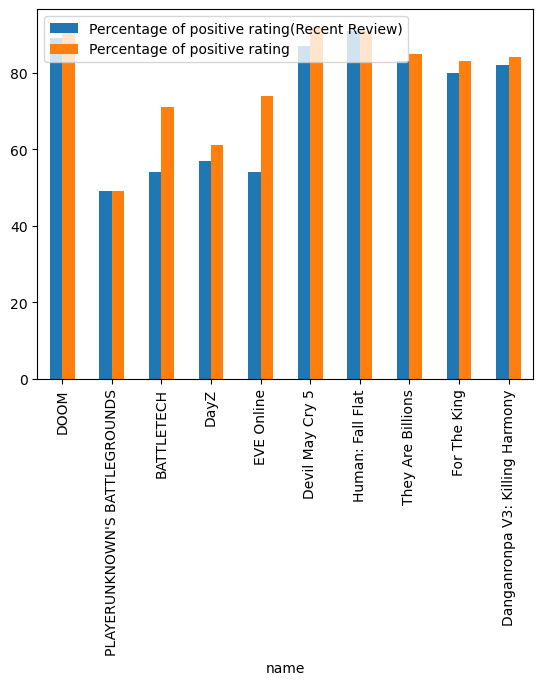

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

temptdata = tempt.head(10)

 
# Using only 10 data as an example to show the relationship
# creating dataframe
plotdata = pd.DataFrame({
    'name': ['DOOM', 'PLAYERUNKNOWN\'S BATTLEGROUNDS', 'BATTLETECH', 'DayZ', 'EVE Online', 'Devil May Cry 5', 'Human: Fall Flat', 'They Are Billions', 'For The King', 'Danganronpa V3: Killing Harmony'],
    'Percentage of positive rating(Recent Review)': [89, 49, 54, 57, 54, 87, 91, 83, 80, 82],
    'Percentage of positive rating': [92, 49, 71, 61, 74, 92, 91, 85, 83, 84]
})
  
# plotting graph
plotdata.plot(x="name", y=["Percentage of positive rating(Recent Review)", "Percentage of positive rating"], kind="bar")


The results shows that if there is an increase in user's review, there will also be an increase in the very positive review that the user rated on the specific type of games.